# GemPy Paper Code: Model and Topology

In this notebook you will be able to see and run the code utilized to create the figures of the paper *GemPy - an open-source library for implicit geological modeling and uncertainty quantification*

In [1]:
# Importing dependencies

# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

import gempy as gp
%matplotlib inline

# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

In [2]:
# Funtion to plot labels of the input data in latex
def annotate_plot(frame, label_col, x, y, **kwargs):
    """
    Annotate the plot of a given DataFrame using one of its columns

    Should be called right after a DataFrame or series plot method,
    before telling matplotlib to show the plot.

    Parameters
    ----------
    frame : pandas.DataFrame

    plot_col : str
        The string identifying the column of frame that was plotted

    label_col : str
        The string identifying the column of frame to be used as label

    kwargs:
        Other key-word args that should be passed to plt.annotate

    Returns
    -------
    None

    Notes
    -----
    After calling this function you should call plt.show() to get the
    results. This function only adds the annotations, it doesn't show
    them.
    """
    import matplotlib.pyplot as plt  # Make sure we have pyplot as plt

    for label, x, y in zip(frame[label_col], frame[x], frame[y]):
        plt.annotate(label, xy=(x + 0.1, y + 0.15), **)

## Building a geological model

First we import the raw data and define model parameters such as resolution or extent

In [43]:
geo_model = gp.create_model('GemPy-Paper-1')

gp.init_data(geo_model, [0,20,0,10,-10,0],[100,10,100],
            path_o = "input_data/paper_Orientations.csv",
            path_i = "input_data/paper_Points.csv")

# Example of method to add extra points directly in Python 
#geo_data.add_interface(X=10, Y=4, Z=-7, formation='fault1')

GemPy-Paper-1  2019-06-19 09:19

Defining all different series that form the most complex model. In the paper you can find figures with different combination of these series to examplify the possible types of topolodies supported in GemPy

In [44]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model,
                          {'fault_serie1': 'fault1',
                           'younger_serie' : 'Unconformity', 
                           'older_serie': ('Layer1', 'Layer2')})

#fig=plt.gcf()
# fig.savefig('doc/figs/fault_pile.pdf')

,surface,series,order_surfaces,isBasement,color,id
0,fault,Default series,1,False,#015482,1
1,Unconformity,younger_serie,1,False,#9f0052,2
2,Layer1,older_serie,1,False,#ffbe00,3
3,Layer2,older_serie,2,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [45]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,fault,Default series,1,False,#015482,1
1,Unconformity,younger_serie,1,False,#9f0052,2
2,Layer1,older_serie,1,False,#ffbe00,3
3,Layer2,older_serie,2,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [46]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,10.000000,4,-7.000000,0.547382,0.483429,0.429351,fault,Default series,1,1
1,4.345153,5,-1.921564,0.358839,0.516771,0.598676,fault,Default series,1,1
2,2.303022,5,-1.647248,0.290750,0.516771,0.607822,Unconformity,younger_serie,2,2
3,1.083840,5,-1.738687,0.250100,0.516771,0.604774,Unconformity,younger_serie,2,2
4,8.825648,5,-3.140747,0.508227,0.516771,0.558026,Unconformity,younger_serie,2,2
5,15.561631,5,-3.232185,0.732818,0.516771,0.554977,Unconformity,younger_serie,2,2
6,2.211584,5,-6.400000,0.287701,0.516771,0.449356,Layer1,older_serie,3,3
7,11.172574,5,-6.981171,0.586478,0.516771,0.429979,Layer1,older_serie,3,3
8,15.104438,5,-8.108915,0.717574,0.516771,0.392378,Layer1,older_serie,3,3
9,2.059186,5,-4.908561,0.282620,0.516771,0.499084,Layer2,older_serie,4,3


The next cell show how specific series can be selected

In [6]:
#geo_data = gp.select_series(geo_data, ['older_serie'])

Visualizing the final data

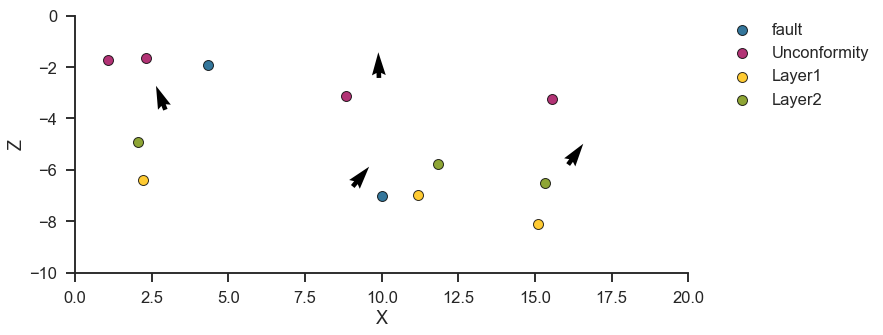

In [48]:
gp.plot.plot_data(geo_model)

Compiling the theano funciton

In [49]:
gp.set_interpolation_data(geo_model,
                          verbose=[], compile_theano=True)

Compiling theano function...
Compilation Done!


In [50]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,fault,Default series,1,False,#015482,1
1,Unconformity,younger_serie,1,False,#9f0052,2
2,Layer1,older_serie,1,False,#ffbe00,3
3,Layer2,older_serie,2,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [51]:
geo_model.set_is_fault('Default series')

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Default series,True,False
younger_serie,False,False
older_serie,False,False
Basement,False,False


Computing the model

In [52]:
sol = gp.compute_model(geo_model)

In [53]:
geo_model.surface_points

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,10.000000,4,-7.000000,0.547382,0.483429,0.429351,fault,Default series,1,1
1,4.345153,5,-1.921564,0.358839,0.516771,0.598676,fault,Default series,1,1
2,2.303022,5,-1.647248,0.290750,0.516771,0.607822,Unconformity,younger_serie,2,2
3,1.083840,5,-1.738687,0.250100,0.516771,0.604774,Unconformity,younger_serie,2,2
4,8.825648,5,-3.140747,0.508227,0.516771,0.558026,Unconformity,younger_serie,2,2
5,15.561631,5,-3.232185,0.732818,0.516771,0.554977,Unconformity,younger_serie,2,2
9,2.059186,5,-4.908561,0.282620,0.516771,0.499084,Layer2,older_serie,3,3
10,11.843125,5,-5.761989,0.608836,0.516771,0.470629,Layer2,older_serie,3,3
11,15.317795,5,-6.493498,0.724688,0.516771,0.446239,Layer2,older_serie,3,3
6,2.211584,5,-6.400000,0.287701,0.516771,0.449356,Layer1,older_serie,4,3


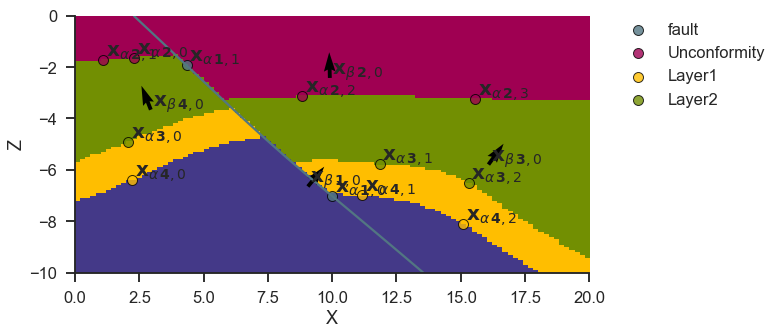

In [55]:
# Plotting
gp.plot.plot_section(geo_model, cell_number=5, show_data=True)

geo_model.surface_points.update_annotations()
geo_model.orientations.update_annotations()
annotate_plot(gp.get_data(geo_model), 'annotations', 'X', 'Z', size = 20)

# plt.savefig("model_2.pdf")

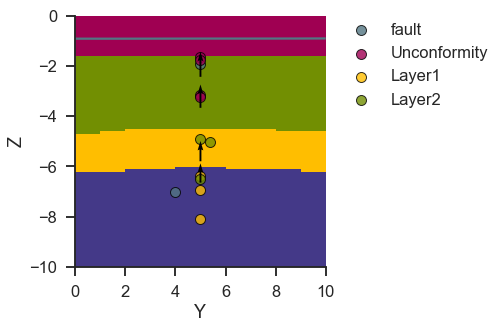

In [73]:
gp.plot.plot_section(geo_model, direction='x', cell_number=16, show_data=True)


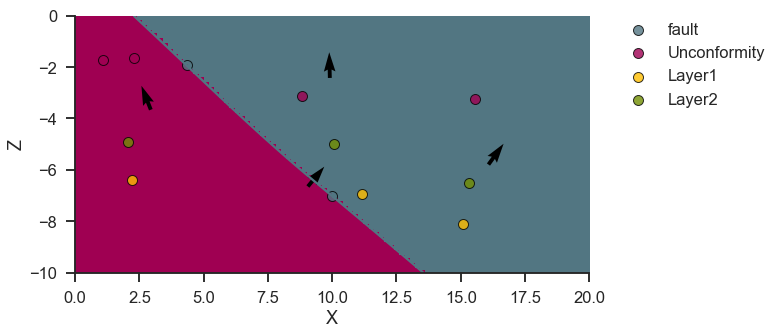

In [62]:
gp.plot.plot_section(geo_model, block=geo_model.solutions.block_matrix[0],
                     cell_number=5, show_data=True)


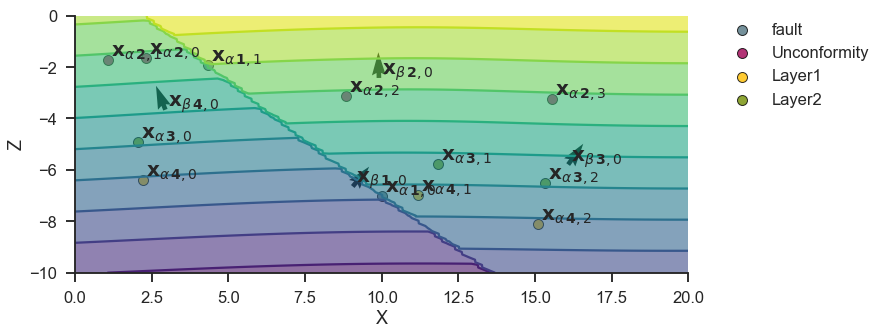

In [57]:
gp.plot.plot_scalar_field(geo_model, 5, cmap="viridis", N = 10, plot_data=True, series=1)
annotate_plot(gp.get_data(geo_model), 'annotations', 'X', 'Z', size = 20)

# plt.savefig("doc/figs/scalar_field_simple.pdf")

In 3D using vtk:

In [59]:
gp.plot.plot_3D(geo_model)

closing vtk


## Topology

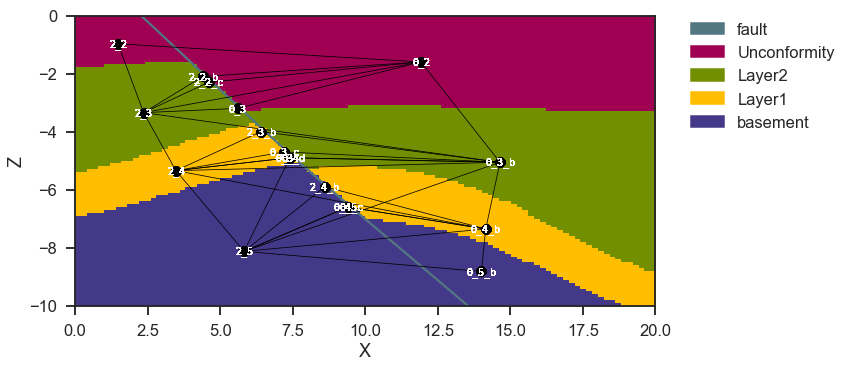

In [61]:
from gempy.assets import topology as tp
G, c, *_ = tp.compute_topology(geo_model)
gp.plot.plot_section(geo_model, 2)
gp.plot.plot_topology(geo_model, G, c)

### Save model

In [74]:
gp.save_model(geo_model)

True